In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

C:\Users\Anant\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
claimdf = pd.read_csv("claims.csv")
custdf = pd.read_csv("cust_demographics.csv")

In [3]:
claimdf.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
custdf.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
finaldf = pd.merge(claimdf,custdf,left_on = "customer_id",right_on="CUST_ID")

In [6]:
finaldf.drop(columns = "CUST_ID",inplace = True)

In [7]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [8]:
finaldf["claim_date"] = pd.to_datetime(finaldf.claim_date)

In [9]:
finaldf.claim_amount=finaldf.claim_amount.apply(lambda x:float(str(x).replace('$',"")))


In [10]:
finaldf["DateOfBirth"] = pd.to_datetime(finaldf.DateOfBirth)

In [11]:
finaldf.Contact=finaldf.Contact.apply(lambda x:float(str(x).replace('-',"")))

In [12]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

In [13]:
finaldf.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,2070-01-13,ME,2.655431e+09,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,7.986315e+09,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver


In [14]:
finaldf.police_report.value_counts()

No         621
Unknown    296
Yes        168
Name: police_report, dtype: int64

In [15]:
finaldf['flag'] = np.where(finaldf.police_report == 'Unknown',0,1)


In [16]:
finaldf.sort_values("claim_date", ascending = False,inplace =True)

In [17]:
finaldf.drop_duplicates(subset = 'customer_id',keep = 'first',inplace = True)


In [18]:
finaldf.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
flag                    0
dtype: int64

In [19]:
finaldf.total_policy_claims.value_counts()

1.0    779
2.0    105
3.0     85
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [20]:
finaldf["claim_amount"].fillna(finaldf.claim_amount.mean(),inplace = True)
finaldf["total_policy_claims"].fillna(finaldf.total_policy_claims.mode(),inplace= True)

In [21]:
from datetime import date
from datetime import datetime
today = date.today()
finaldf["age"] = finaldf.DateOfBirth.apply(lambda x:int((today-datetime.date(x)).days/365))


In [22]:
finaldf

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,age
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,Male,2067-09-08,ME,1.347852e+09,Gold,1,-44
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,Female,1976-05-20,NE,2.711231e+09,Gold,0,46
1055,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,Male,2068-04-22,FL,6.735748e+09,Gold,1,-45
941,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,Male,1977-04-28,MO,9.628349e+09,Gold,1,45
322,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,Female,1986-03-18,AK,4.369347e+09,Silver,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.000000,1.0,No,Female,1999-08-05,NH,6.495929e+09,Platinum,1,23
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,Female,1993-08-13,TN,3.969733e+09,Gold,1,29
195,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.000000,1.0,No,Female,1974-02-14,NM,9.181747e+09,Silver,0,48
177,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,Male,1985-11-16,TX,3.927395e+09,Gold,1,37


In [23]:
finaldf.loc[(finaldf.age < 18),'cus_cat'] = 'Children'
finaldf.loc[(finaldf.age >=18) & (finaldf.age <30),'cus_cat'] = 'Youth'
finaldf.loc[(finaldf.age >=30) & (finaldf.age <60),'cus_cat'] = 'Adult'
finaldf.loc[(finaldf.age >=60),'cus_cat'] = 'Senior'

In [24]:
finaldf

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,age,cus_cat
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,Male,2067-09-08,ME,1.347852e+09,Gold,1,-44,Children
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,Female,1976-05-20,NE,2.711231e+09,Gold,0,46,Adult
1055,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,Male,2068-04-22,FL,6.735748e+09,Gold,1,-45,Children
941,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,Male,1977-04-28,MO,9.628349e+09,Gold,1,45,Adult
322,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,Female,1986-03-18,AK,4.369347e+09,Silver,0,36,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.000000,1.0,No,Female,1999-08-05,NH,6.495929e+09,Platinum,1,23,Youth
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,Female,1993-08-13,TN,3.969733e+09,Gold,1,29,Youth
195,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.000000,1.0,No,Female,1974-02-14,NM,9.181747e+09,Silver,0,48,Adult
177,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,Male,1985-11-16,TX,3.927395e+09,Gold,1,37,Adult


In [25]:
finaldf.groupby("Segment")["claim_amount"].mean()

Segment
Gold        12846.400227
Platinum    12371.654843
Silver      12267.859374
Name: claim_amount, dtype: float64

In [26]:
finaldf["ndays"] = finaldf.claim_date.apply(lambda x:(datetime.strptime("01/10/2018","%d/%m/%Y")-(x)).days)

In [27]:
x = finaldf.loc[finaldf.ndays>20,:].groupby("incident_cause")[["claim_amount"]].sum()
x.astype(int)

,claim_amount
incident_cause,
Crime,721938
Driver error,3315850
Natural causes,1312987
Other causes,3723151
Other driver error,3277536


In [28]:
finaldf[(finaldf.State.isin(['TX','DE','AK']))&(finaldf.cus_cat == "Adult")&(finaldf.incident_cause.isin(['Driver error','Other driver error']))].shape[0]

21

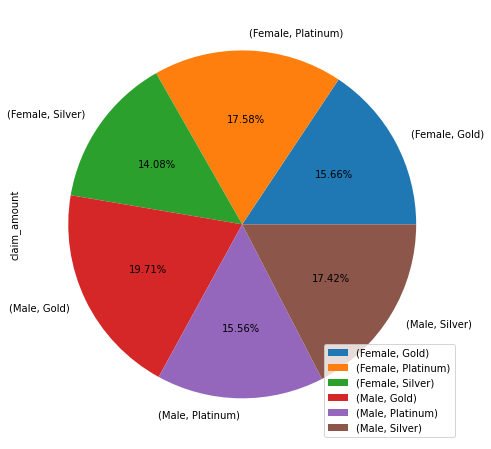

In [29]:
finaldf.groupby(["gender","Segment"])[["claim_amount"]].sum().plot.pie(subplots=True,autopct='%.2f%%',figsize=(8,8))
plt.legend()

In [30]:
finaldf[finaldf.incident_cause.isin(["Driver error","Other driver error"])].groupby("gender")[["total_policy_claims"]].sum()

,total_policy_claims
gender,
Female,376.0
Male,439.0


In [31]:
finaldf[finaldf.fraudulent == "Yes"].groupby("cus_cat")[["total_policy_claims"]].sum()

,total_policy_claims
cus_cat,
Adult,200.0
Children,145.0
Youth,79.0


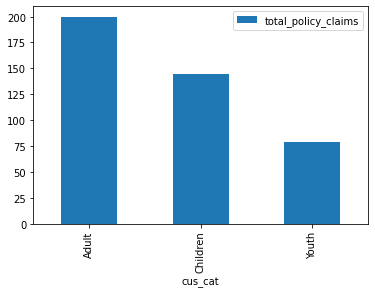

In [32]:
finaldf[finaldf.fraudulent == "Yes"].groupby("cus_cat")[["total_policy_claims"]].sum().plot.bar()

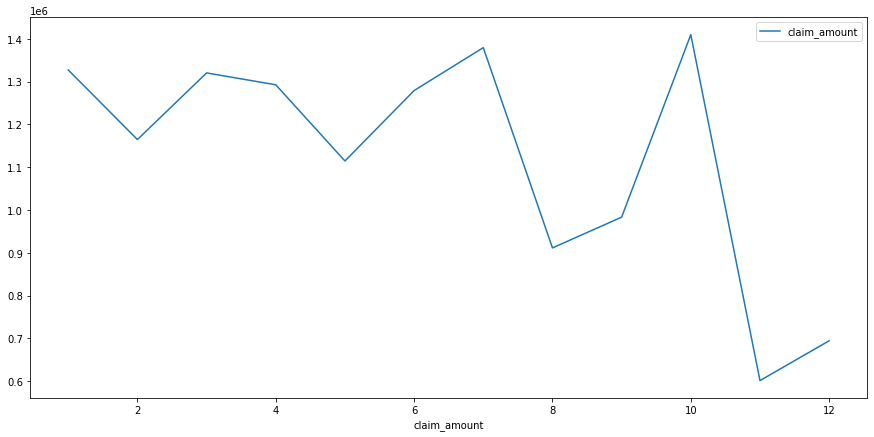

In [33]:
finaldf.groupby(finaldf.claim_date.dt.month)[["claim_amount"]].sum().plot(xlabel ="claim_amount",figsize=(15,7))

In [40]:
dat1 = finaldf.groupby("gender")[["claim_amount"]].mean()
dat1

,claim_amount
gender,
Female,12101.160475
Male,12884.845111


In [41]:
dat2 = finaldf.groupby("cus_cat")[["claim_amount"]].mean()
dat2

,claim_amount
cus_cat,
Adult,13232.730884
Children,11738.231576
Youth,11851.166466


In [38]:
import seaborn

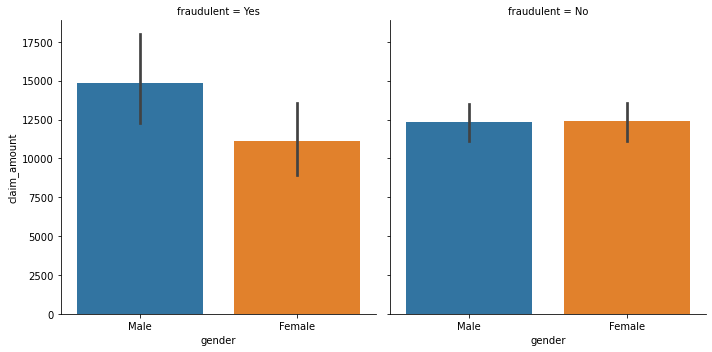

In [43]:
so = seaborn.catplot(x = "gender",y="claim_amount",col="fraudulent",kind='bar',data=finaldf)

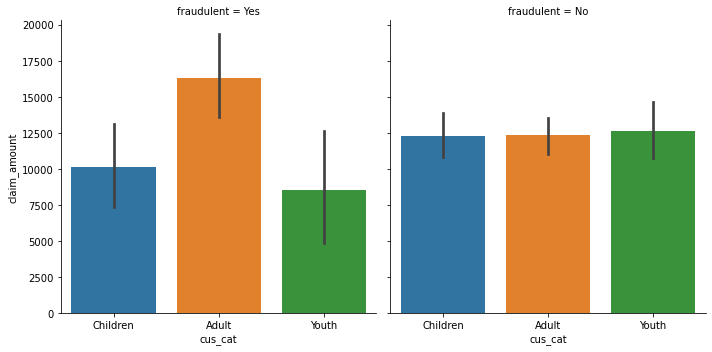

In [45]:
so = seaborn.catplot(x = "cus_cat",y="claim_amount",col="fraudulent",kind='bar',data=finaldf)
so

In [62]:
dat1

,claim_amount
gender,
Female,12101.160475
Male,12884.845111


In [47]:
import scipy.stats as stats

In [67]:
stats.ttest_ind(a=finaldf['claim_amount'].loc[finaldf['gender']=="Male"],b=finaldf['claim_amount'].loc[finaldf['gender']=="Female"],equal_var=True)

Ttest_indResult(statistic=0.9625093446632118, pvalue=0.33601006135365463)

as the p value is >0.05 we fail to reject null hypothesis.
there from the t test and also oberserving the mean values we can conclude that there is a similarity between amoount claimed by males and females.

In [100]:
x = finaldf[finaldf.claim_date.dt.year == 2018 ]
y =finaldf[finaldf.claim_date.dt.year == 2017]
x["claim_amount"].mean()

12743.437531675843

In [101]:
y["claim_amount"].mean()

12304.037138614538

In [104]:
stats.ttest_ind(a=x["claim_amount"],b=y["claim_amount"],equal_var=True)

Ttest_indResult(statistic=0.5369235615889859, pvalue=0.5914314161928885)

as teh p value is grater tahn 0.05 we fail to reject null hypothesis. as you can see there was no significant raise in claim ampount from 2017 to 2018

In [71]:
agecat = pd.crosstab(finaldf.cus_cat,finaldf.Segment)

null hypothesis= there is no relationship between age and segment
aleternate hypothesis= ther is relationship betweena ge and segement

In [72]:
agecat

Segment,Gold,Platinum,Silver
cus_cat,,,
Adult,187,182,166
Children,113,110,112
Youth,71,69,68


In [74]:
stats.chi2_contingency(agecat)

(0.5886720425407048,
 0.9643141241774152,
 4,
 array([[184.12337662, 179.16048237, 171.716141  ],
        [115.29220779, 112.18460111, 107.52319109],
        [ 71.58441558,  69.65491651,  66.7606679 ]]))

as the p value is > 0.05 w fail to reject the null hypothesis. so there is  no relationship between age and segment categories.

In [105]:
age1 = finaldf.loc[finaldf.cus_cat == "Children","total_policy_claims"].dropna()
age2 = finaldf.loc[finaldf.cus_cat == "Adult","total_policy_claims"].dropna()
age3 = finaldf.loc[finaldf.cus_cat == "Youth","total_policy_claims"].dropna()


In [106]:
age1.mean()

1.603030303030303

In [107]:
age2.mean()

1.5526315789473684

In [108]:
age3.mean()

1.6601941747572815

In [88]:
stats.f_oneway(age1,age2,age3)

F_onewayResult(statistic=0.6861895721066684, pvalue=0.5037133951259001)

hence the p value is grater than 0.05 we fail to reject the null hypothesis therefore there is no difference between the age groups and inscurance claims 

In [75]:
finaldf["total_policy_claims"].corr(finaldf["claim_amount"])

-0.022028915434014293

total number of policy claims and the claimed amount are negatively corelated or inversly propolational.